In [12]:
import pandas as pd
import os


In [13]:
path_afrikids = 'shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data'
files = os.listdir(path_afrikids)
files


['AfriKids CBE Cycle 4 Learner Facilitator LC-SMC Training.xls',
 'AfriKids CBE Cycle 3 Learner Facilitator LC-SMC Training.xlsx',
 'Afrikids CBE Cycle 5  Learner Facilitator LC-SMC Training.xls',
 'AfriKids CBE Cycle 1 Learner Facilitator LC-SMC Training.xls',
 'AfriKids CBE Cycle 2 Learner Facilitator LC-SMC Training.xls']

In [14]:
sorted_files = sorted(files)
sorted_files

['AfriKids CBE Cycle 1 Learner Facilitator LC-SMC Training.xls',
 'AfriKids CBE Cycle 2 Learner Facilitator LC-SMC Training.xls',
 'AfriKids CBE Cycle 3 Learner Facilitator LC-SMC Training.xlsx',
 'AfriKids CBE Cycle 4 Learner Facilitator LC-SMC Training.xls',
 'Afrikids CBE Cycle 5  Learner Facilitator LC-SMC Training.xls']

In [15]:
df = []


In [16]:
for f in files:
    try:
        data = pd.read_excel(path_afrikids + '/' + f, 'Learner Data Template')
        df.append(data)
    except:
        data = pd.read_excel(path_afrikids + '/' + f)
        df.append(data)

In [17]:
import matplotlib.pyplot as plt 


In [18]:
df[0]['DROP OUT (YES/NO)'].replace(['NO', 'YES'],
                        [0, 1], inplace=True)

<Axes: xlabel='DROP OUT (YES/NO)', ylabel='Count'>

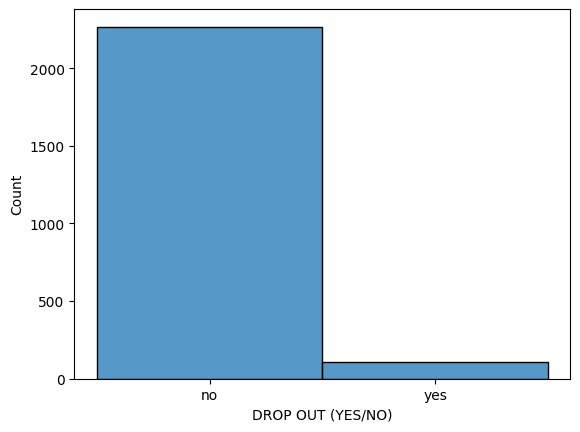

In [19]:
import seaborn as sns
sns.histplot(df[4]['DROP OUT (YES/NO)'].str.lower())


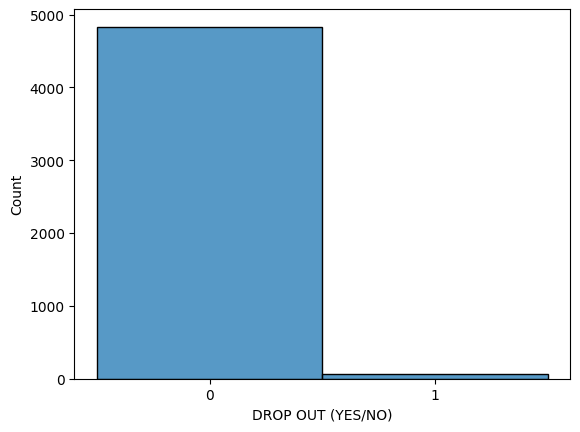

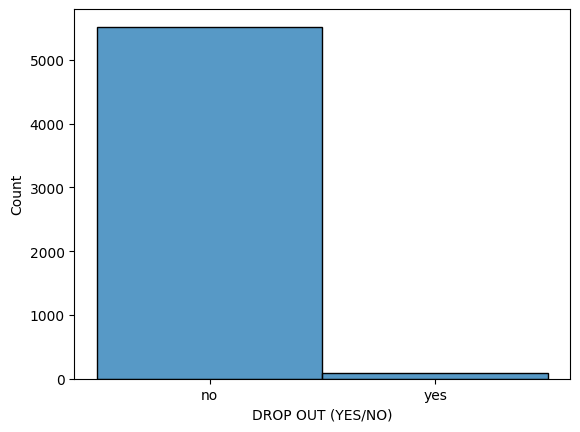

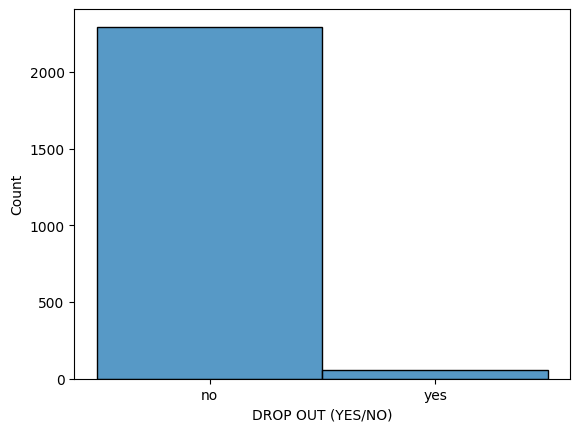

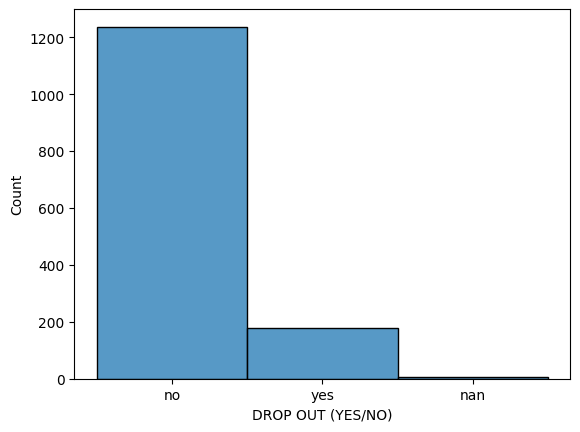

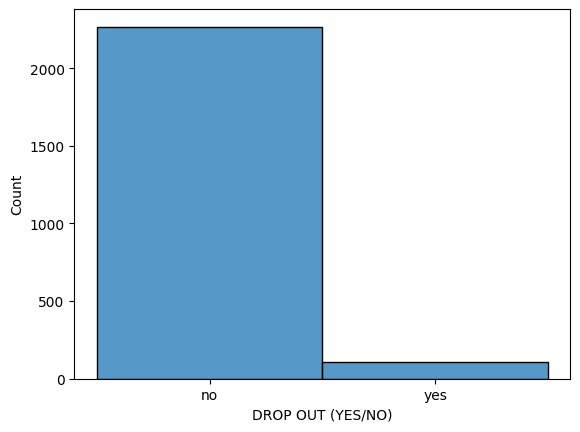

<Figure size 640x480 with 0 Axes>

In [20]:
for i in range(0, 5):
    ax = sns.histplot(df[i]['DROP OUT (YES/NO)'].apply(str).str.lower())
    plt.figure()

In [21]:
df[0]["AGE"]
df[0]['DROP OUT (YES/NO)'].apply(str).str.lower()
df[0]['SEX']

0       F
1       F
2       F
3       F
4       M
       ..
4895    M
4896    M
4897    M
4898    M
4899    M
Name: SEX, Length: 4900, dtype: object

In [22]:
columns = ['DROP OUT (YES/NO)', 'AGE', 'SEX']
df_combined = pd.DataFrame(df[0], columns=columns)
df_combined

,DROP OUT (YES/NO),AGE,SEX
0,0,8,F
1,0,8,F
2,0,8,F
3,0,8,F
4,0,8,M
...,...,...,...
4895,0,11,M
4896,0,13,M
4897,0,8,M
4898,0,10,M


In [23]:
X = ["Yes", "No"]
super_dataframe_male = []
for i in range(0,5):
    df_combined = pd.DataFrame(df[i], columns=columns)
    df_2 = df_combined.query('SEX=="M"')
    super_dataframe_male.append(df_2)

print(super_dataframe_male)

[      DROP OUT (YES/NO)  AGE SEX
4                     0    8   M
5                     0    8   M
6                     0    8   M
7                     0    8   M
8                     0    8   M
...                 ...  ...  ..
4895                  0   11   M
4896                  0   13   M
4897                  0    8   M
4898                  0   10   M
4899                  0   12   M

[2273 rows x 3 columns],      DROP OUT (YES/NO)  AGE SEX
0                   NO   12   M
1                   NO   13   M
10                  NO   11   M
12                  NO   12   M
13                  NO   10   M
...                ...  ...  ..
5608                No   10   M
5609                No    9   M
5610                No    9   M
5611                No   10   M
5612                No    9   M

[2739 rows x 3 columns],      DROP OUT (YES/NO)  AGE SEX
17                  NO    9   M
18                  NO    9   M
19                  NO   10   M
20                  NO    9   M
21     

In [24]:

super_dataframe_male = pd.concat(super_dataframe_male, axis=0, ignore_index=True)
print(super_dataframe_male)

     DROP OUT (YES/NO)   AGE SEX
0                    0   8.0   M
1                    0   8.0   M
2                    0   8.0   M
3                    0   8.0   M
4                    0   8.0   M
...                ...   ...  ..
7875               Yes  14.0   M
7876               Yes  14.0   M
7877               Yes  13.0   M
7878               Yes  10.0   M
7879               Yes   9.0   M

[7880 rows x 3 columns]


Text(0.5, 1.0, 'Count of male students of all ages who have not dropped out vs who have dropped out over all cycles')

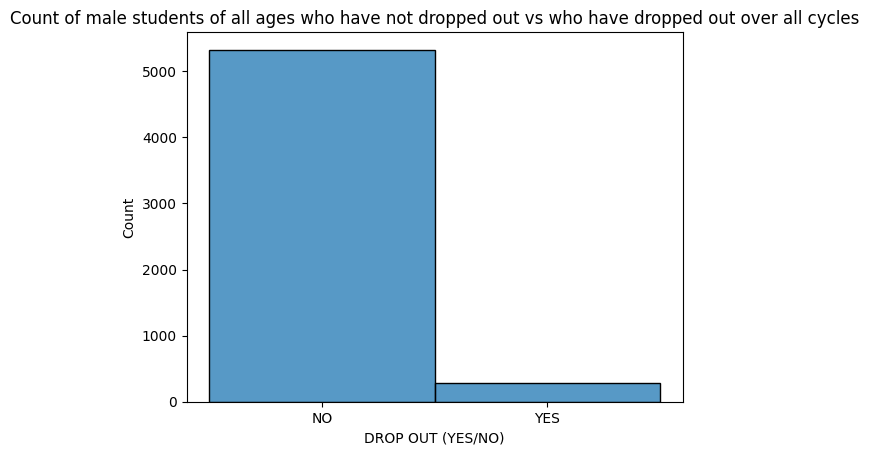

In [29]:
ax = sns.histplot(super_dataframe_male['DROP OUT (YES/NO)'].str.upper())
plt.title("Count of male students of all ages who have not dropped out vs who have dropped out over all cycles")


In [26]:
X = ["Yes", "No"]
super_dataframe_female = []
for i in range(0,5):
    df_combined = pd.DataFrame(df[i], columns=columns)
    df_2 = df_combined.query('SEX=="F"')
    super_dataframe_female.append(df_2)

In [27]:
super_dataframe_female = pd.concat(super_dataframe_female)

Text(0.5, 1.0, 'Count of female students of all ages who have not dropped out vs who have dropped out over all cycles')

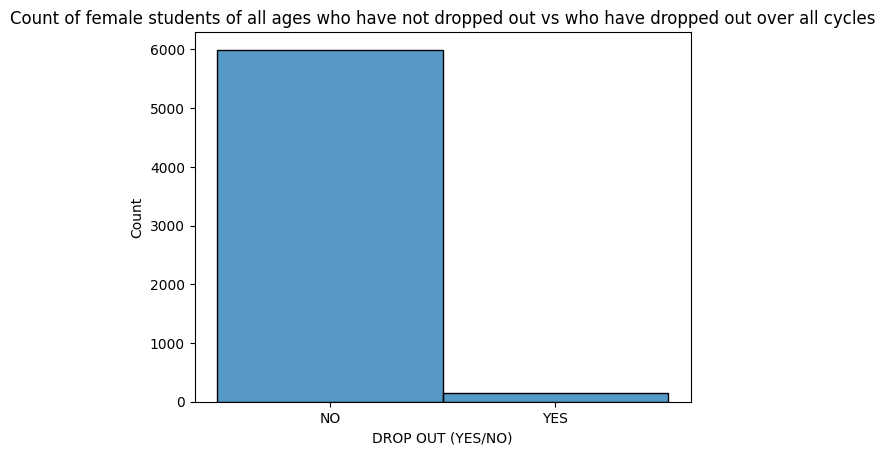

In [30]:
ax = sns.histplot(super_dataframe_female['DROP OUT (YES/NO)'].str.upper())
plt.title("Count of female students of all ages who have not dropped out vs who have dropped out over all cycles")


In [66]:
df[0]['GRADUATED (YES/NO)']

0       YES
1       YES
2       YES
3       YES
4       YES
       ... 
4895    YES
4896    YES
4897    YES
4898    YES
4899    YES
Name: GRADUATED (YES/NO), Length: 4900, dtype: object

In [223]:
columns = ['GRADUATED (YES/NO)', 'SEX', 'TRANSITIONED (YES/NO)', 'DISTRICT', 'AGE', 'DROP OUT (YES/NO)']
df_combined_graduation = []
df_combined_graduation.append( pd.DataFrame(df[0], columns=columns))
df_combined_graduation.append(pd.DataFrame(df[1], columns=columns))
df_combined_graduation.append(pd.DataFrame(df[2], columns=columns))
df_combined_graduation.append(pd.DataFrame(df[3], columns=columns))
df_combined_graduation.append(pd.DataFrame(df[4], columns=columns))

In [225]:
df_combined_graduation = pd.concat(df_combined_graduation, axis = 0)
df_combined_graduation = df_combined_graduation.rename(columns={"GRADUATED (YES/NO)": "GRADUATED", "TRANSITIONED (YES/NO)" : "TRANSITIONED", "DROP OUT (YES/NO)":"DROPOUT"})

print(df_combined_graduation)

     GRADUATED SEX TRANSITIONED DISTRICT   AGE DROPOUT
0          YES   F          YES    Bongo   8.0       0
1          YES   F          YES    Bongo   8.0       0
2          YES   F          YES    Bongo   8.0       0
3          YES   F          YES    Bongo   8.0       0
4          YES   M          YES    Bongo   8.0       0
...        ...  ..          ...      ...   ...     ...
2371        No   M           No  Talensi  13.0     Yes
2372        No   F           No  Talensi   9.0     Yes
2373        No   F           No  Talensi   9.0     Yes
2374        No   M           No  Talensi  10.0     Yes
2375        No   M           No  Talensi   9.0     Yes

[16662 rows x 6 columns]


Text(0.5, 1.0, 'Females graduation over all cycles')

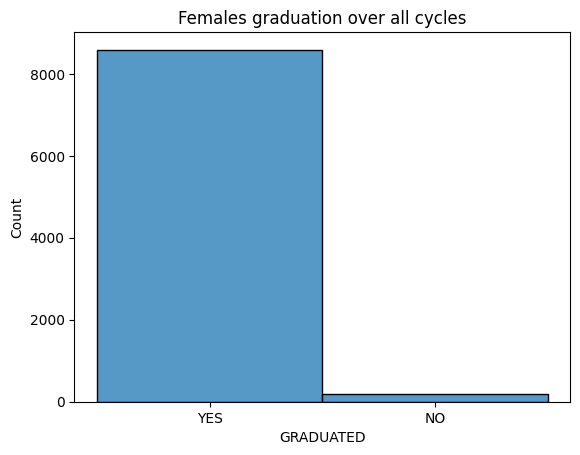

In [226]:
df_2 = df_combined_graduation.query('SEX=="F"')
sns.histplot(df_2['GRADUATED'].str.upper())
plt.title("Females graduation over all cycles")


Text(0.5, 1.0, 'Males graduation over all cycles')

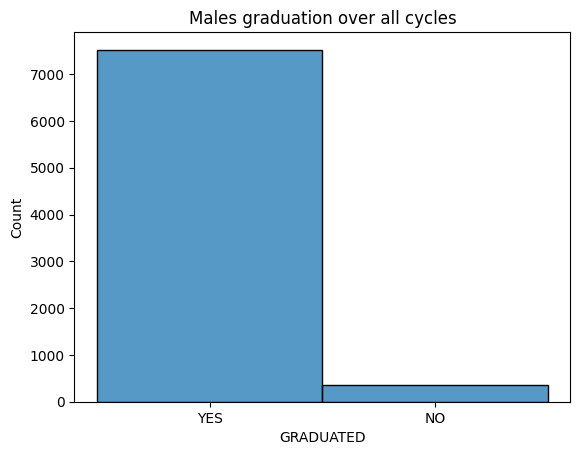

In [227]:
df_2 = df_combined_graduation.query('SEX=="M"')
sns.histplot(df_2['GRADUATED'].str.upper())
plt.title("Males graduation over all cycles")


Text(0.5, 1.0, 'Males transitioned over all cycles')

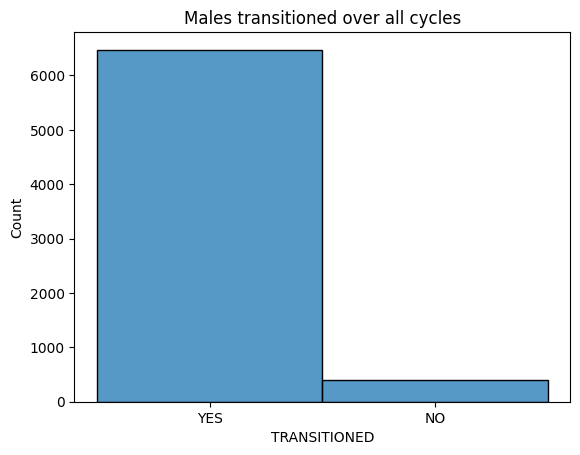

In [228]:
df_2 = df_combined_graduation.query('SEX=="M"')
sns.histplot(df_2['TRANSITIONED'].str.upper())

plt.title("Males transitioned over all cycles")


Text(0.5, 1.0, 'Females transitioned over all cycles')

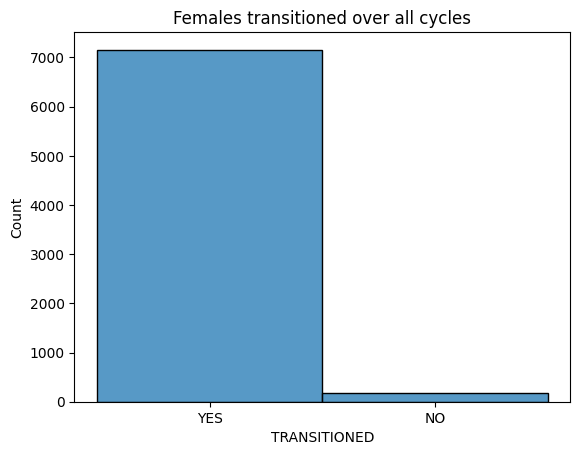

In [229]:
df_2 = df_combined_graduation.query('SEX=="F"')
sns.histplot(df_2['TRANSITIONED'].str.upper())
plt.title("Females transitioned over all cycles")


<Axes: ylabel='DISTRICT'>

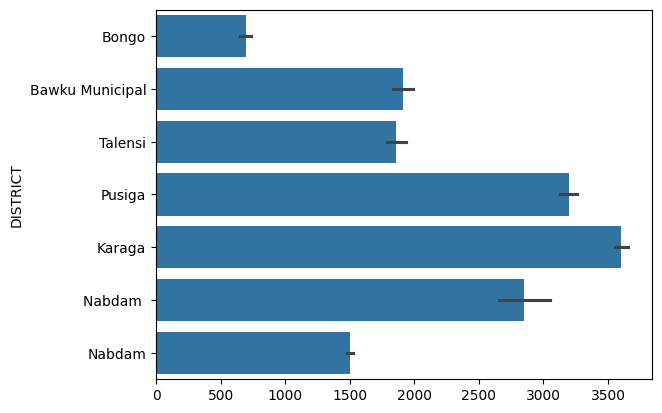

In [235]:
df_combined_graduation["GRADUATED"] = df_combined_graduation["GRADUATED"].str.upper()
df_combined_graduation["TRANSITIONED"] = df_combined_graduation["TRANSITIONED"].str.upper()
df_combined_graduation["DROPOUT"] = df_combined_graduation["DROPOUT"].str.upper()

df_2 = df_combined_graduation.query('SEX=="F" & GRADUATED=="YES" & TRANSITIONED=="YES"')
#print(df_combined_graduation)
sns.barplot(df_2['DISTRICT'])

<Axes: ylabel='DISTRICT'>

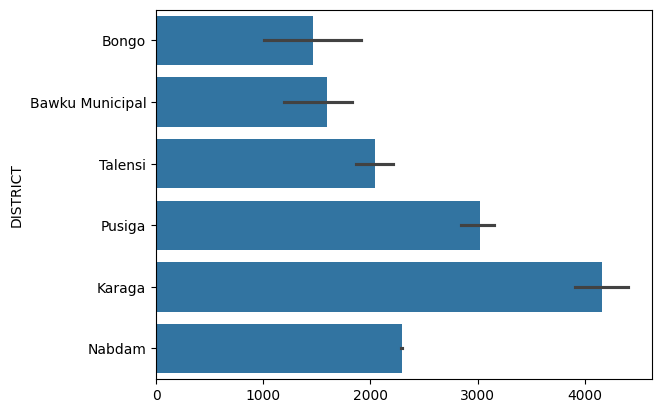

In [236]:
df_2 = df_combined_graduation.query('SEX=="F" & GRADUATED=="NO" & TRANSITIONED=="NO"')
sns.barplot(df_2['DISTRICT'])

<Axes: ylabel='DISTRICT'>

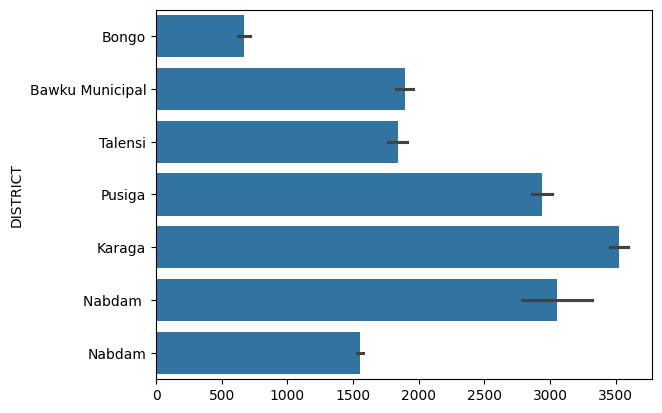

In [237]:
df_2 = df_combined_graduation.query('SEX=="M" & GRADUATED=="YES" & TRANSITIONED=="YES"')
sns.barplot(df_2['DISTRICT'])

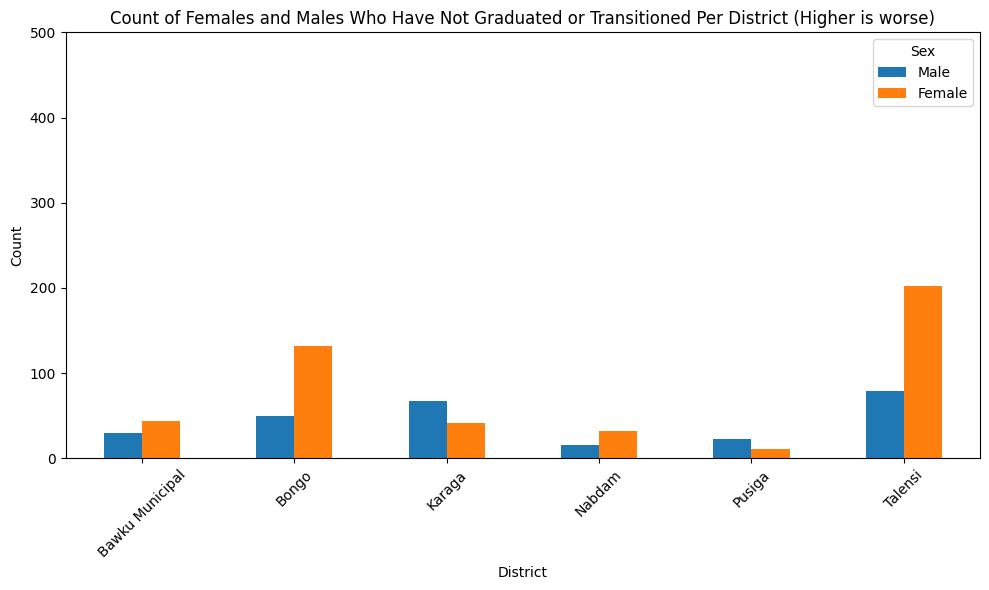

In [263]:
df_2 = df_combined_graduation.query('GRADUATED=="NO" | TRANSITIONED=="NO"')
df_2 = df_2[df_2['SEX'].isin(['M', 'F'])]
grouped_data = df_2.groupby(['DISTRICT', 'SEX']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the grouped bar plot
grouped_data.plot(kind='bar', ax=ax)

# Setting labels and title
ax.set_xlabel('District')
ax.set_ylabel('Count')
ax.set_title('Count of Females and Males Who Have Not Graduated or Transitioned Per District (Higher is worse)')
ax.legend(title='Sex', labels=['Male', 'Female'])
ax.set_ylim([0, 500])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


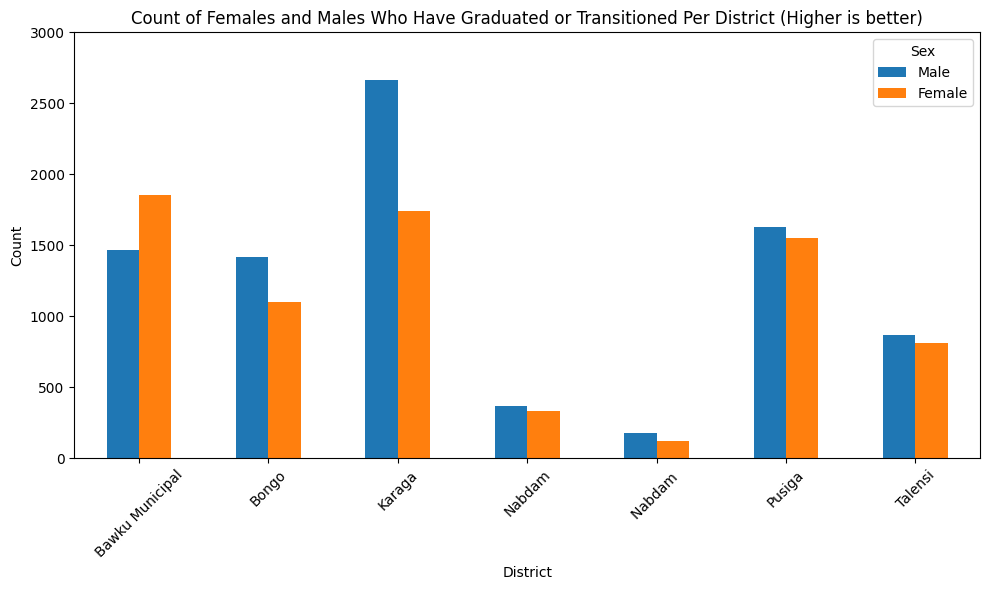

In [262]:
df_2 = df_combined_graduation.query('GRADUATED=="YES" | TRANSITIONED=="YES"')
df_2 = df_2[df_2['SEX'].isin(['M', 'F'])]
grouped_data = df_2.groupby(['DISTRICT', 'SEX']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the grouped bar plot
grouped_data.plot(kind='bar', ax=ax)

# Setting labels and title
ax.set_xlabel('District')
ax.set_ylabel('Count')
ax.set_title('Count of Females and Males Who Have Graduated or Transitioned Per District (Higher is better)')
ax.legend(title='Sex', labels=['Male', 'Female'])
ax.set_ylim([0, 3000])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

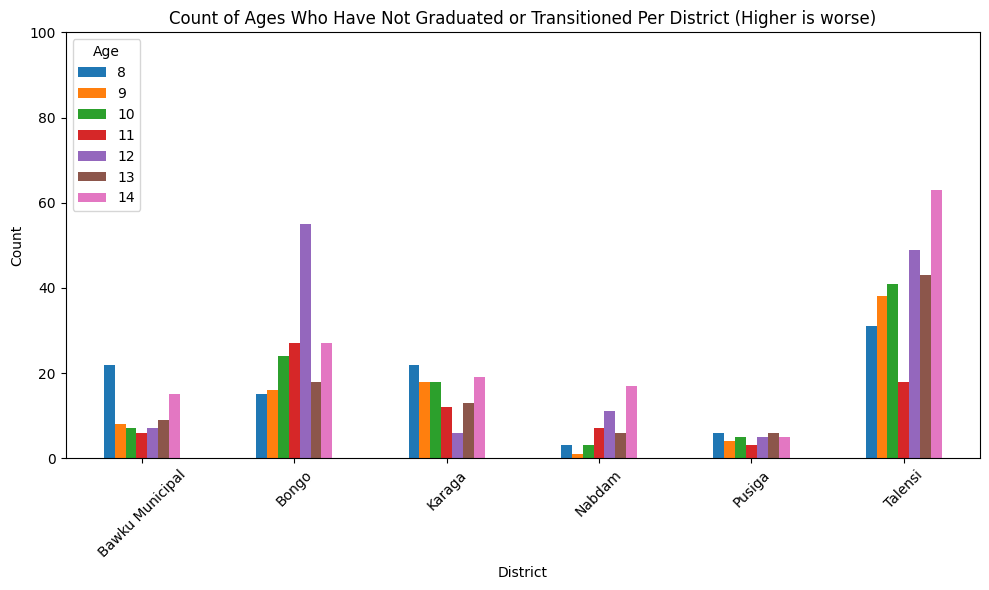

In [261]:
df_2 = df_combined_graduation.query('GRADUATED=="NO" | TRANSITIONED=="NO"')
grouped_data = df_2.groupby(['DISTRICT', 'AGE']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the grouped bar plot
grouped_data.plot(kind='bar', ax=ax)

# Setting labels and title
ax.set_xlabel('District')
ax.set_ylabel('Count')
ax.set_title('Count of Ages Who Have Not Graduated or Transitioned Per District (Higher is worse)')
ax.legend(title='Age', labels=['8', '9', '10', '11', '12', '13', '14' ])
ax.set_ylim([0, 100])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


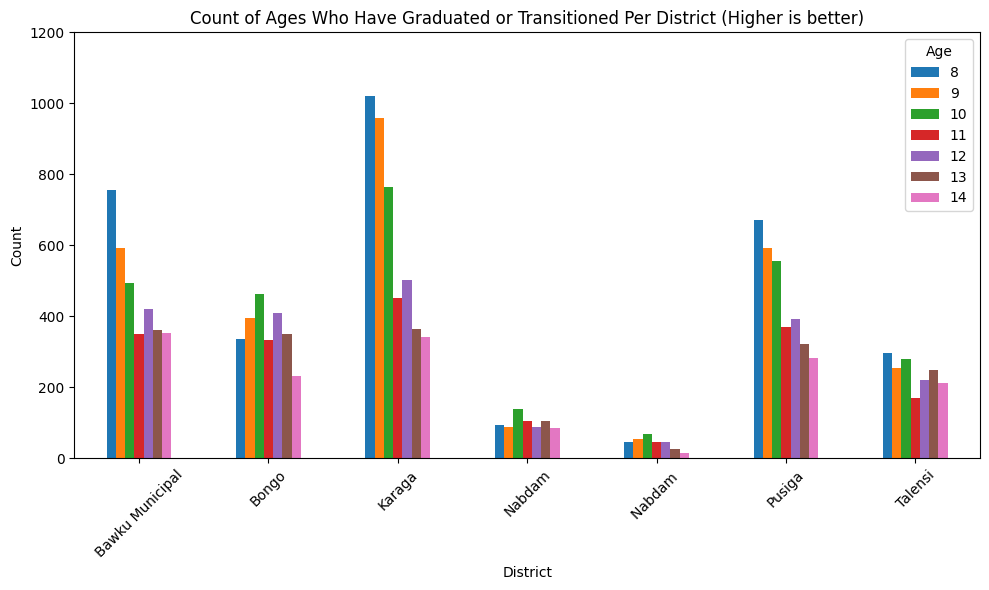

In [260]:
df_2 = df_combined_graduation.query('GRADUATED=="YES" | TRANSITIONED=="YES"')
grouped_data = df_2.groupby(['DISTRICT', 'AGE']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the grouped bar plot
grouped_data.plot(kind='bar', ax=ax)

# Setting labels and title
ax.set_xlabel('District')
ax.set_ylabel('Count')
ax.set_title('Count of Ages Who Have Graduated or Transitioned Per District (Higher is better)')
ax.legend(title='Age', labels=['8', '9', '10', '11', '12', '13', '14' ])
ax.set_ylim([0, 1200])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

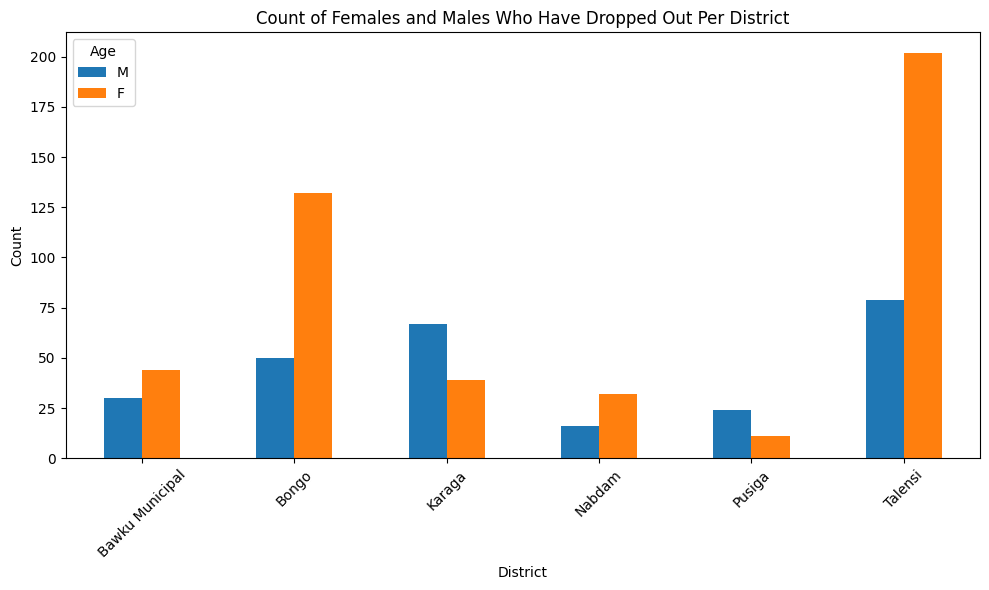

In [241]:
df_2 = df_combined_graduation.query('DROPOUT=="YES")
df_2 = df_2[df_2['SEX'].isin(['M', 'F'])]
grouped_data = df_2.groupby(['DISTRICT', 'SEX']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the grouped bar plot
grouped_data.plot(kind='bar', ax=ax)

# Setting labels and title
ax.set_xlabel('District')
ax.set_ylabel('Count')
ax.set_title('Count of Females and Males Who Have Dropped Out Per District')
ax.legend(title='Age', labels=['M','F' ])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
